# **Persiapan Dataset**

Mengunduh **KAGGLE_USERNAME** dan **KAGGLE_KEY** dari [kaggle](https://kaggle.com) beserta dengan dataset.

Pada kasus ini saya menggunakan dataset **Anime Recommendation Database 2020**.

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "adipalguna"
os.environ['KAGGLE_KEY'] = "9d40f189cf57009c1cea3a0eea52b897"
!kaggle datasets download -d hernan4444/anime-recommendation-database-2020

 98% 649M/661M [00:11<00:00, 67.3MB/s]
100% 661M/661M [00:11<00:00, 61.8MB/s]


Ekstrak file menggunakan library ***zipfile***.

In [2]:
import zipfile

local_zip = '/content/anime-recommendation-database-2020.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Data Understanding**

Mengubah dataset menjadi dataframe menggunakan library ***pandas***.

In [3]:
import pandas as pd
 
anime = pd.read_csv('/content/anime.csv')
anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


Terdapat total 35 jenis variable pada dataset ini. Beberapa diantaranya yaitu:

* *MAL_ID*: *unique* ID yang mendefinisikan suatu anime
* *Name*: Judul dari suatu anime
* *Score*: Rata-rata penilaian dari suatu anime
* *Genres*: Genre dari suatu anime
* *English Name*: Judul anime dalam bahasa inggris
* *Japanese Name*: Judul anime dalam bahasa jepang
* *Type*: Tipe dari suatu anime (TV, *Movie*, dan lain-lain)
* *Episodes*: Jumlah episode dari suatu anime
* *Aired*: Rentang waktu penayangan dari suatu anime
* *Premiered*: Penayangan perdana dari suatu anime.

Melihat informasi dataset menggunakan fungsi ***info()***.

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Mengecek *missing value* atau nilai yang hilang pada dataset menggunakan fungsi ***isnull()*** dan ***sum***.

In [5]:
anime.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

# **Univariate EDA**

Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *MAL_ID*.

In [6]:
print('Jumlah Anime berdasarkan MAL_ID: ', len(anime.MAL_ID.unique()))
print('anime_id:', anime.MAL_ID.unique())

Jumlah Anime berdasarkan MAL_ID:  17562
anime_id: [    1     5     6 ... 48488 48491 48492]


Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Name*.

In [7]:
print('Jumlah Anime berdasarkan Name: ', len(anime.Name.unique()))
print('Name:', anime.Name.unique())

Jumlah Anime berdasarkan Name:  17558
Name: ['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun' ...
 'Higurashi no Naku Koro ni Sotsu' 'Yama no Susume: Next Summit'
 'Scarlet Nexus']


Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Genres*.

In [8]:
print('Jumlah Anime berdasarkan Genres: ', len(anime.Genres.unique()))
print('Genres:', anime.Genres.unique())

Jumlah Anime berdasarkan Genres:  5034
Genres: ['Action, Adventure, Comedy, Drama, Sci-Fi, Space'
 'Action, Drama, Mystery, Sci-Fi, Space'
 'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen' ...
 'Horror, Demons, Supernatural, Thriller' 'Sci-Fi, Space, Vampire'
 'Adventure, Mystery, Supernatural']


Import beberapa library seperti ***seaborn*** dan ***pyplot*** untuk melakukan Visualisasi Data pada variable *Genres*.

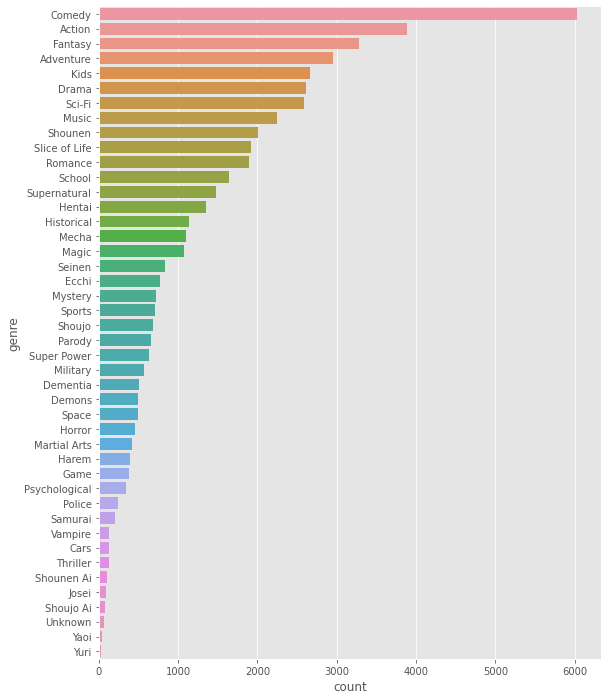

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import itertools
from collections import Counter 

anime.Genres = anime.Genres.fillna('None')
genre_anime = anime.Genres.apply(lambda x: x.split(', ')).values.tolist()
Genres = itertools.chain(*genre_anime)
genre_count = Counter(Genres)

genre_df = pd.DataFrame.from_dict(genre_count,orient='index').reset_index()
genre_df.columns = ["genre","count"]
genre_df = genre_df.sort_values('count', ascending=False)
plt.figure(figsize=(9,12))
sns.barplot(x=genre_df["count"], y=genre_df["genre"])

Berdasarkan hasil Visualisasi Data, dapat dilihat bahwa anime dengan genre Comedy memiliki jumlah terbanyak dibandingkan dengan genre lainnya.

Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Type*.

In [10]:
print('Jumlah tipe pada variable Type: ', len(anime['Type'].unique()))
print('Type', anime['Type'].unique())

Jumlah tipe pada variable Type:  7
Type ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Unknown']


Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Episodes*.

In [11]:
print('Jumlah akumulasi pada variable Episodes: ', len(anime.Episodes.unique()))
print('Episodes', anime.Episodes.unique())

Jumlah akumulasi pada variable Episodes:  201
Episodes ['26' '1' '52' '145' '24' '74' '220' 'Unknown' '178' '12' '22' '69' '25'
 '4' '94' '5' '3' '13' '23' '43' '6' '50' '47' '51' '49' '39' '8' '7' '75'
 '62' '14' '44' '45' '64' '101' '27' '161' '2' '153' '70' '78' '42' '11'
 '167' '150' '366' '9' '16' '38' '48' '10' '76' '40' '20' '37' '41' '112'
 '224' '180' '296' '358' '63' '276' '46' '54' '15' '21' '35' '124' '86'
 '102' '36' '67' '291' '110' '29' '55' '201' '142' '109' '34' '136' '32'
 '73' '114' '19' '195' '58' '155' '96' '103' '113' '104' '192' '191' '203'
 '56' '500' '80' '172' '65' '117' '28' '61' '30' '148' '128' '100' '17'
 '243' '92' '105' '79' '31' '1787' '53' '33' '130' '18' '97' '193' '115'
 '170' '66' '330' '108' '68' '119' '95' '137' '60' '77' '72' '127' '99'
 '373' '300' '163' '91' '88' '154' '156' '694' '87' '225' '164' '215' '59'
 '182' '305' '365' '1471' '331' '175' '143' '200' '510' '151' '1428' '84'
 '726' '140' '83' '3057' '147' '1006' '425' '85' '260' '526' '18

Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Score*.

In [12]:
print('Jumlah akumulasi pada variable Score: ', len(anime.Score.unique()))
print('Score', anime.Score.unique())

Jumlah akumulasi pada variable Score:  533
Score ['8.78' '8.39' '8.24' '7.27' '6.98' '7.95' '8.06' '7.59' '8.15' '8.76'
 '7.91' '8.52' '7.9' '6.38' '7.94' '7.42' '7.76' '7.32' '7.51' '8.32'
 '7.45' '8.51' '8.49' '8.29' '8.73' '8.31' '7.56' '8.17' '7.35' '6.31'
 '7.26' '7.14' '7.1' '6.53' '5.91' '7.05' '7.43' '7.66' '7.2' '6.77'
 '6.62' '7.44' '7.65' '7.98' '7.58' '7.38' '6.35' '8.07' '7.96' '7.3'
 '7.99' '7.09' '7.78' '8.03' '6.79' '7.92' '6.66' '7.68' '6.67' '6.76'
 '7.72' '7.79' '7.22' '7.7' '7.82' '7.46' '7.31' '7.48' '7.39' '7.23'
 '6.46' '7.29' '6.81' '7.63' '6.83' '4.95' '7.93' '6.97' '6.85' '6.56'
 '7.69' '7.64' '6.86' '6.49' '6.91' '6.96' '7.41' '7.61' '6.21' '8.11'
 '8.42' '8.33' '8.21' '6.14' '6.87' '7.11' '7.24' '7.12' '7.28' '6.59'
 '7.34' '6.34' '7.33' '6.94' '6.48' '8.72' '8.53' '6.93' '6.63' '6.19'
 '7.55' '7.18' '6.69' '7.21' '6.37' '8.12' '7.89' '6.11' '7.25' '6.8'
 '7.17' '6.88' '6.55' '8.83' '6.75' '8.5' '7.16' '7.4' '7.67' '6.26'
 '6.02' '6.15' '5.94' '6.28' '7.52' 

Mengecek jumlah keseluruhan dan nilai *unique* pada variabel *Members*.

In [13]:
print('Jumlah akumulasi pada variable Members: ', len(anime.Members.unique()))
print('Members', anime.Members.unique())

Jumlah akumulasi pada variable Members:  9508
Members [1251960  273145  558913 ...    7010   11309    1386]


# **Data Preparation**

Mengecek jumlah tipe *Music* pada variable *Type*.

In [14]:
music = (anime['Type']=='Music').sum()
print(music)

1469


*Drop* atau hilangkan variable *Music* pada variable *Type*.

In [15]:
anime = anime.loc[(anime['Type']!='Music')]
anime.shape

(16093, 35)

*Drop* variable yang tidak diperlukan.

In [16]:
anime = anime.drop(columns=['Score', 'English name', 'Japanese name', 'Type', 'Episodes', 'Aired', 'Premiered'])
anime.head()

,MAL_ID,Name,Genres,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural","TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [17]:
anime = anime.drop(columns=['Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites'])
anime.head()

,MAL_ID,Name,Genres,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [18]:
anime = anime.drop(columns=['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6'])
anime.head()

,MAL_ID,Name,Genres,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",634.0,265.0,83.0,50.0,27.0


In [19]:
anime = anime.drop(columns=['Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'])
anime.head()

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"


Mengecek kembali dataframe.

In [20]:
anime

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy"


*Drop* data yang sama berdasarkan *MAL_ID*

In [21]:
anime = anime.drop_duplicates('MAL_ID')
anime

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy"


# **One-Hot Encoding**

Membagi variabel *Genres* menjadi beberapa list.

In [22]:
anime['Genres'] = anime['Genres'].str.split(',')
anime

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"[Action, Adventure, Comedy, Drama, Sci-Fi,..."
1,5,Cowboy Bebop: Tengoku no Tobira,"[Action, Drama, Mystery, Sci-Fi, Space]"
2,6,Trigun,"[Action, Sci-Fi, Adventure, Comedy, Drama,..."
3,7,Witch Hunter Robin,"[Action, Mystery, Police, Supernatural, Dr..."
4,8,Bouken Ou Beet,"[Adventure, Fantasy, Shounen, Supernatural]"
...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"[Adventure, Mystery, Supernatural]"
17558,48483,Mieruko-chan,"[Comedy, Horror, Supernatural]"
17559,48488,Higurashi no Naku Koro ni Sotsu,"[Mystery, Dementia, Horror, Psychological, ..."
17560,48491,Yama no Susume: Next Summit,"[Adventure, Slice of Life, Comedy]"


**One-Hot Encoding** pada variable *Genres*.

In [23]:
for index, row in anime.iterrows():
  for genre in row['Genres']:
    anime.at[index, genre] = 1

Memberi nilai 0 pada kolom yang bernilai kosong.

In [24]:
anime_new = anime.fillna(0)
anime_new

,MAL_ID,Name,Genres,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Shounen,Police,Supernatural,Magic,Adventure,Fantasy,Sports,Comedy,Josei,Romance,Slice of Life,Slice of Life,Cars,Seinen,Drama,Horror,Psychological,Thriller,Super Power,Martial Arts,School,Ecchi,Vampire,Military,Historical,Dementia,Mecha,Sci-Fi,Demons,Samurai,...,Space,Shoujo Ai,Music,Game,Mecha,Supernatural,Shounen Ai,Kids,Historical,Mystery,School,Hentai,Hentai,Parody,Fantasy,Ecchi,Horror,Kids,Sports,Yuri,Dementia,Magic,Romance,Police,Psychological,Cars,Shounen,Demons,Parody,Yaoi,Shoujo,Super Power,Vampire,Martial Arts,Seinen,Yaoi,Thriller,Josei,Unknown,Shounen Ai
0,1,Cowboy Bebop,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,Cowboy Bebop: Tengoku no Tobira,"[Action, Drama, Mystery, Sci-Fi, Space]",1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,Trigun,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,Witch Hunter Robin,"[Action, Mystery, Police, Supernatural, Dr...",1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,Bouken Ou Beet,"[Adventure, Fantasy, Shounen, Supernatural]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"[Adventure, Mystery, Supernatural]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17558,48483,Mieruko-chan,"[Comedy, Horror, Supernatural]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17559,48488,Higurashi no Naku Koro ni Sotsu,"[Mystery, Dementia, Horror, Psychological, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

*Drop* variable *MAL_ID* dan *Genres*.

In [25]:
anime_new = anime_new.drop(columns=['MAL_ID', 'Genres'])
anime_new

,Name,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Shounen,Police,Supernatural,Magic,Adventure,Fantasy,Sports,Comedy,Josei,Romance,Slice of Life,Slice of Life,Cars,Seinen,Drama,Horror,Psychological,Thriller,Super Power,Martial Arts,School,Ecchi,Vampire,Military,Historical,Dementia,Mecha,Sci-Fi,Demons,Samurai,Samurai,Game,...,Space,Shoujo Ai,Music,Game,Mecha,Supernatural,Shounen Ai,Kids,Historical,Mystery,School,Hentai,Hentai,Parody,Fantasy,Ecchi,Horror,Kids,Sports,Yuri,Dementia,Magic,Romance,Police,Psychological,Cars,Shounen,Demons,Parody,Yaoi,Shoujo,Super Power,Vampire,Martial Arts,Seinen,Yaoi,Thriller,Josei,Unknown,Shounen Ai
0,Cowboy Bebop,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cowboy Bebop: Tengoku no Tobira,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Trigun,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Witch Hunter Robin,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bouken Ou Beet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17558,Mieruko-chan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17559,Higurashi no Naku Koro ni Sotsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17560,Yama no Susume: Next Summit,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# **Modeling**

Mengambil nilai yang menjadi genre pada dataframe.

In [26]:
genre = anime_new.iloc[:,1:].values
genre.shape

(16093, 84)

Menghitung derajat kesamaan antar anime menggunakan library ***sklearn.metrics.pairwise*** yaitu ***cosine_similarity***.

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre) 
cosine_sim

array([[1.        , 0.73029674, 0.83333333, ..., 0.        , 0.23570226,
        0.28867513],
       [0.73029674, 1.        , 0.54772256, ..., 0.        , 0.        ,
        0.31622777],
       [0.83333333, 0.54772256, 1.        , ..., 0.        , 0.23570226,
        0.28867513],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 0.23570226, ..., 0.        , 1.        ,
        0.        ],
       [0.28867513, 0.31622777, 0.28867513, ..., 0.        , 0.        ,
        1.        ]])

Membuat dataframe dari variable *similarity_check*.

Mengecek *Matrik Similarity* antar anime.

In [28]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_new['Name'], columns=anime_new['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (16093, 16093)


Name,Miyamoto Musashi: Souken ni Haseru Yume,Osaru no Kantai,Anzen no Shiteiseki Child Seat,The☆Doraemons: Mushimushi Pyonpyon Daisakusen!,Tokyo Babylon,Meiji Tokyo Renka Movie 1: Yumihari no Serenade,"Suteki Desu wa, Sakura-chan! Tomoyo no Cardcaptor Sakura Katsuyaku Video Nikki!",Kaeru Ouji to Imomushi Henry,Misemono Kenbutsu,Hello Kitty no Fushigi na Mizuumi
Name,,,,,,,,,,
Detective Conan Movie 19: The Hellfire Sunflowers,0.250000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.000000
Arakawa Under the Bridge x Bridge,0.000000,0.0,0.0,0.0,0.000000,0.288675,0.408248,0.333333,0.0,0.000000
Nekketsu Saikyou Go-Saurer,0.288675,0.0,0.0,0.0,0.288675,0.000000,0.000000,0.000000,0.0,0.000000
Ushiro no Shoumen Daare,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Utopa,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Blood-C: None-None Gekijou,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.408248,0.0,0.000000
Kimoshiba,0.000000,0.0,0.0,0.0,0.250000,0.000000,0.353553,0.288675,0.0,0.353553
Kanai,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Floating Material,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


# **Sistem Rekomendasi Anime**

Mengambil data anime dengan fungsi ***argpartition()*** untuk melakukan partisi.

Mengubah dataframe menjadi *numpy* dengan fungsi ***to_numpy()***.

Mengambil data anime dengan similarity terbesar dari index.

*Drop* variable *Name* dengan fungsi ***drop()***.

In [29]:
def anime_recommendations(anime_name, anime_similarity=cosine_sim_df, items=anime[['Name', 'Genres']], k=10):
  index = anime_similarity.loc[:,anime_name].to_numpy().argpartition (
      range(-1, -k, -1))
  
  closest = anime_similarity.columns[index[-1:-(k+2):-1]]
  
  closest = closest.drop(anime_name, errors='ignore')
  
  return pd.DataFrame(closest).merge(items).head(k)

In [30]:
anime[anime.Name.eq('One Piece')]

,MAL_ID,Name,Genres,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Shounen,Police,Supernatural,Magic,Adventure,Fantasy,Sports,Comedy,Josei,Romance,Slice of Life,Slice of Life,Cars,Seinen,Drama,Horror,Psychological,Thriller,Super Power,Martial Arts,School,Ecchi,Vampire,Military,Historical,Dementia,Mecha,Sci-Fi,Demons,Samurai,...,Space,Shoujo Ai,Music,Game,Mecha,Supernatural,Shounen Ai,Kids,Historical,Mystery,School,Hentai,Hentai,Parody,Fantasy,Ecchi,Horror,Kids,Sports,Yuri,Dementia,Magic,Romance,Police,Psychological,Cars,Shounen,Demons,Parody,Yaoi,Shoujo,Super Power,Vampire,Martial Arts,Seinen,Yaoi,Thriller,Josei,Unknown,Shounen Ai
11,21,One Piece,"[Action, Adventure, Comedy, Super Power, D...",1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rekomendasi anime berdasarkan judul anime.

In [31]:
anime_recommendations('One Piece')

,Name,Genres
0,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"[Action, Adventure, Comedy, Super Power, D..."
1,One Piece: Long Ring Long Land-hen,"[Action, Adventure, Comedy, Super Power, D..."
2,One Piece Movie 14: Stampede,"[Action, Adventure, Comedy, Drama, Fantasy..."
3,One Piece: Episode of Sorajima,"[Action, Adventure, Comedy, Super Power, D..."
4,One Piece: Episode of East Blue - Luffy to 4-n...,"[Action, Adventure, Comedy, Super Power, D..."
5,One Piece: Episode of Nami - Koukaishi no Nami...,"[Action, Adventure, Comedy, Drama, Fantasy..."
6,One Piece: Episode of Merry - Mou Hitori no Na...,"[Action, Adventure, Comedy, Drama, Fantasy..."
7,One Piece Movie 3: Chinjuu-jima no Chopper Oukoku,"[Action, Adventure, Comedy, Super Power, F..."
8,One Piece Film: Gold Episode 0 - 711 ver.,"[Action, Adventure, Comedy, Super Power, F..."
9,One Piece Film: Z,"[Action, Adventure, Comedy, Drama, Fantasy..."


Dapat dilihat bahwa rekomendasi anime yang diberikan bervariasi serta sesuai dengan genre. Hal ini membuktikan bahwa model rekomendasi yang dibuat sudah baik.

# **Evaluation**

Formula dari **Metrik Precission**:

Metrik Precission = (Total Prediksi Berdasarkan Genre yang Benar)/(Total Rekomendasi yang telah Diberikan)

Metrik Precission = (10 / 10) x 100%

Metrik Precission = 100%

Dapat dilihat dari seluruh rekomendasi yang diberikan terdapat judul-judul anime yang bervariasi dan relevan dengan anime yang menjadi rujukan. Hal ini membuktikan bahwa model sistem rekomendasi yang dibuat sudah bagus. Selain itu, dengan evaluasi menggunakan **Metrik Precission** didapat hasil rekomendasi yang optimal sebesar 100%.
